In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
### Dataset : https://www.kaggle.com/jainshukal/netflix-stock-price

In [5]:
df = pd.read_csv("NFLX.csv")

In [6]:
df.head()

,Date,Open,Close,Adj Close,Volume
0,1/2/2019,259.279999,267.660004,267.660004,11679500
1,1/3/2019,270.200012,271.200012,271.200012,14969600
2,1/4/2019,281.880005,297.570007,297.570007,19330100
3,1/7/2019,302.100006,315.339996,315.339996,18620100
4,1/8/2019,319.980011,320.269989,320.269989,15359200


In [7]:
df.shape

(242, 5)

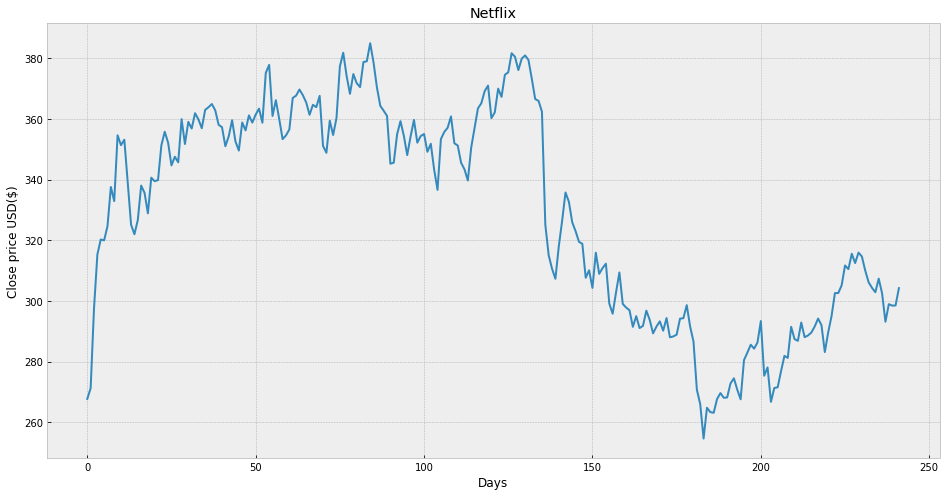

In [8]:
plt.figure (figsize = (16,8))
plt.title("Netflix")
plt.xlabel ("Days")
plt.ylabel ("Close price USD($)")
plt.plot(df['Close'])
plt.show()

In [9]:
df = df[['Close']]

In [10]:
df.head(4)

,Close
0,267.660004
1,271.200012
2,297.570007
3,315.339996


In [11]:
future_days = 25
df ['Prediction'] = df[['Close']].shift(-future_days)

In [12]:
df.head()

,Close,Prediction
0,267.660004,344.709991
1,271.200012,347.570007
2,297.570007,345.730011
3,315.339996,359.970001
4,320.269989,351.769989


In [13]:
df.tail()

,Close,Prediction
237,293.119995,NaN
238,298.929993,NaN
239,298.440002,NaN
240,298.500000,NaN
241,304.209991,NaN


In [14]:
x = np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[267.660004]
 [271.200012]
 [297.570007]
 [315.339996]
 [320.269989]
 [319.959991]
 [324.660004]
 [337.589996]
 [332.940002]
 [354.640015]
 [351.390015]
 [353.190002]
 [339.100006]
 [325.160004]
 [321.98999 ]
 [326.670013]
 [338.049988]
 [335.660004]
 [328.899994]
 [340.660004]
 [339.5     ]
 [339.850006]
 [351.339996]
 [355.809998]
 [352.190002]
 [344.709991]
 [347.570007]
 [345.730011]
 [359.970001]
 [351.769989]
 [359.070007]
 [356.869995]
 [361.920013]
 [359.910004]
 [356.970001]
 [363.019989]
 [363.910004]
 [364.970001]
 [362.869995]
 [358.100006]
 [357.320007]
 [351.040009]
 [354.299988]
 [359.609985]
 [352.600006]
 [349.600006]
 [358.859985]
 [356.269989]
 [361.209991]
 [358.820007]
 [361.459991]
 [363.440002]
 [358.779999]
 [375.220001]
 [377.869995]
 [361.01001 ]
 [366.230011]
 [359.970001]
 [353.369995]
 [354.609985]
 [356.559998]
 [366.959991]
 [367.720001]
 [369.75    ]
 [367.880005]
 [365.48999 ]
 [361.410004]
 [364.709991]
 [363.920013]
 [367.649994]
 [351.140015]
 [348.

In [15]:
y = np.array(df['Prediction'])[:-future_days]

In [16]:
print(y)

[344.709991 347.570007 345.730011 359.970001 351.769989 359.070007
 356.869995 361.920013 359.910004 356.970001 363.019989 363.910004
 364.970001 362.869995 358.100006 357.320007 351.040009 354.299988
 359.609985 352.600006 349.600006 358.859985 356.269989 361.209991
 358.820007 361.459991 363.440002 358.779999 375.220001 377.869995
 361.01001  366.230011 359.970001 353.369995 354.609985 356.559998
 366.959991 367.720001 369.75     367.880005 365.48999  361.410004
 364.709991 363.920013 367.649994 351.140015 348.869995 359.459991
 354.73999  360.350006 377.339996 381.890015 374.230011 368.329987
 374.850006 371.829987 370.540009 378.809998 379.059998 385.029999
 378.670013 370.459991 364.369995 362.75     361.040009 345.26001
 345.609985 354.98999  359.309998 354.450012 348.109985 354.269989
 359.730011 352.209991 354.390015 355.059998 349.190002 351.850006
 343.279999 336.630005 353.399994 355.730011 357.130005 360.869995
 352.01001  351.269989 345.559998 343.429993 339.730011 350.619

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [18]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)

In [19]:
x_future = df.drop(['Prediction'],1)[:-future_days]

In [20]:
x_future

,Close
0,267.660004
1,271.200012
2,297.570007
3,315.339996
4,320.269989
...,...
212,292.859985
213,288.029999
214,288.589996
215,289.570007


In [21]:
x_future = x_future.tail(future_days)

In [22]:
x_future = np.array(x_future)

In [23]:
x_future

array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

In [24]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[294.179993 292.01001  292.859985 289.619995 306.160004 302.570007
 302.600006 305.160004 311.690002 310.480011 315.549988 312.48999
 315.929993 314.660004 309.98999  306.160004 304.320007 302.859985
 307.350006 271.5      280.480011 298.929993 286.279999 298.5
 271.269989]

[290.52947675 288.07996653 285.99067151 294.47229491 296.07691308
 297.77978963 296.941453   298.27100289 302.90151109 291.07963363
 292.8807489  285.44051463 288.44018173 288.59082766 292.0751716
 295.37611027 294.95039604 301.6571081  299.0111008  298.61812626
 302.58057134 299.41716715 299.78393775 300.42579694 301.73569895]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


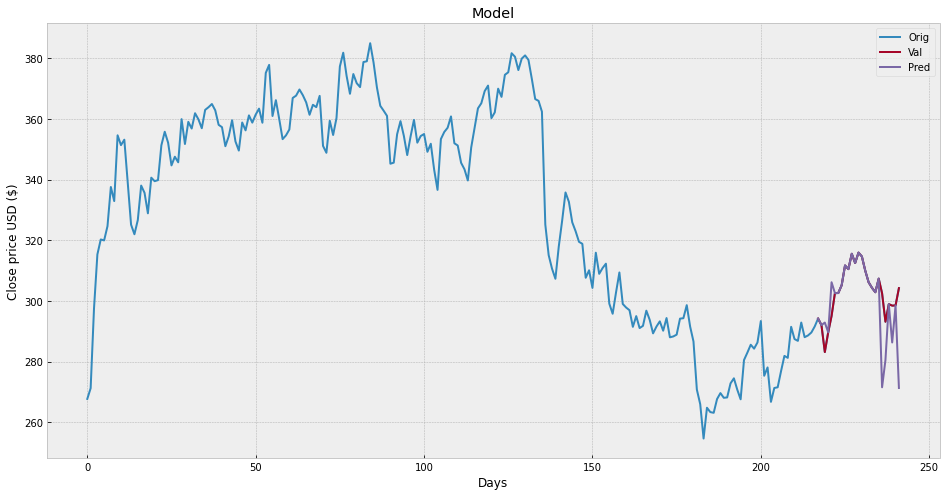

In [29]:
predictions = tree_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel("Close price USD ($)")
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(["Orig","Val","Pred"])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


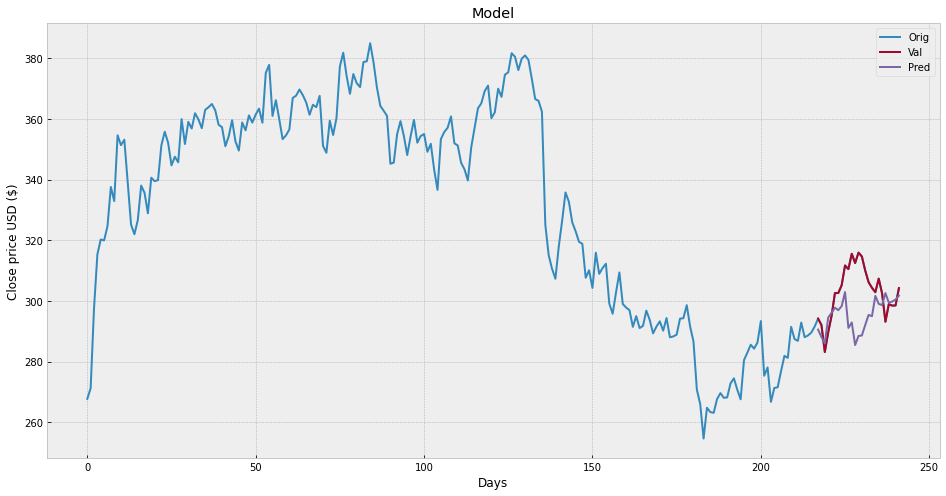

In [30]:
predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel("Close price USD ($)")
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(["Orig","Val","Pred"])
plt.show()